In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

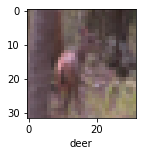

In [15]:
plot_sample(X_train, y_train, 399)

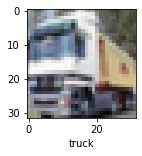

In [16]:

plot_sample(X_train, y_train, 1)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.9298 - accuracy: 0.3048
Epoch 2/5
1563/1563 [==============================] - 59s 37ms/step - loss: 1.6476 - accuracy: 0.4217
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5536 - accuracy: 0.4497
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4914 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4362 - accuracy: 0.49570s - loss: 1.436


In [20]:
y_pred = ann.predict(X_test)
y_pred[:5]

array([[0.24472699, 0.5701563 , 0.677806  , 0.90120137, 0.48996526,
        0.76976085, 0.8553148 , 0.06472707, 0.45164797, 0.15560958],
       [0.61816424, 0.96803534, 0.21087247, 0.28925768, 0.10858032,
        0.13793033, 0.04617819, 0.08933061, 0.91925776, 0.99032485],
       [0.89686763, 0.93963754, 0.25557044, 0.27649456, 0.13806233,
        0.228661  , 0.01072076, 0.21665505, 0.91340375, 0.93703854],
       [0.70131606, 0.5890328 , 0.6771232 , 0.47770512, 0.5640876 ,
        0.38191885, 0.06439966, 0.39678746, 0.7955089 , 0.49587458],
       [0.10535726, 0.07326388, 0.82199526, 0.71851456, 0.9568885 ,
        0.72832054, 0.92104083, 0.29237512, 0.2167072 , 0.07893243]],
      dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 1, 8, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

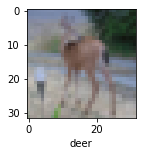

In [23]:
plot_sample(X_test, y_test,100)

In [24]:
classes[y_classes[100]]

'dog'

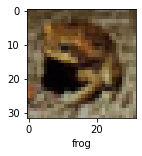

In [25]:
plot_sample(X_test, y_test,300)

In [26]:
classes[y_classes[300]]

'frog'

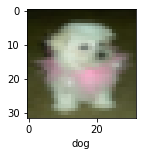

In [27]:
plot_sample(X_test, y_test,3000)

In [28]:
classes[y_classes[3000]]

'dog'